In [1]:
# <1> 
# Import libraries
import seaborn as sns
import pandas as pd
import numpy as np

from gc import collect


from matplotlib import patheffects as path_effects
import matplotlib.pyplot as plt

from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.cluster import KMeans
from folium.plugins import HeatMap

import folium

In [2]:
# load three datasets of fatal crash
df_I = pd.read_csv("Crash_Reporting_Incidents_Data.csv")

C:\Users\ywei1\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_I_sampling = df_I.sample(n=5000) 

In [4]:
df_I_sampling.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 36438 to 29947
Data columns (total 46 columns):
Report Number                   5000 non-null object
Local Case Number               5000 non-null object
Agency Name                     5000 non-null object
ACRS Report Type                5000 non-null object
Unnamed: 4                      0 non-null float64
Crash Date                      5000 non-null object
Crash Time                      5000 non-null object
Hit/Run                         5000 non-null object
Route Type                      4342 non-null object
Mile Point                      4368 non-null float64
Mile Point Direction            4344 non-null object
Lane Direction                  4369 non-null object
Lane Number                     5000 non-null int64
Lane Type                       516 non-null object
Number of Lanes                 5000 non-null int64
Direction                       4368 non-null object
Distance                        4505 non-nul

In [5]:
df_I_sampling['ACRS Report Type'].value_counts()

Property Damage Crash    3209
Injury Crash             1775
Fatal Crash                16
Name: ACRS Report Type, dtype: int64

In [6]:
df_I_sampling = df_I_sampling[df_I_sampling['ACRS Report Type'] != 'Fatal Crash']

In [7]:
df_I_sampling['ACRS Report Type'].value_counts()

Property Damage Crash    3209
Injury Crash             1775
Name: ACRS Report Type, dtype: int64

In [8]:
df_f = pd.read_csv("Crash_Reporting_IncidentsData_Part.csv")

In [9]:
df_I_sampling1 = pd.concat([df_I_sampling, df_f], ignore_index=True)

In [10]:
df_I_sampling1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5158 entries, 0 to 5157
Data columns (total 46 columns):
Report Number                   5158 non-null object
Local Case Number               5158 non-null object
Agency Name                     5158 non-null object
ACRS Report Type                5158 non-null object
Unnamed: 4                      0 non-null float64
Crash Date                      5158 non-null object
Crash Time                      5158 non-null object
Hit/Run                         5158 non-null object
Route Type                      4494 non-null object
Mile Point                      4521 non-null float64
Mile Point Direction            4496 non-null object
Lane Direction                  4523 non-null object
Lane Number                     5158 non-null int64
Lane Type                       524 non-null object
Number of Lanes                 5158 non-null int64
Direction                       4521 non-null object
Distance                        4659 non-null flo

In [11]:
df_D = pd.read_csv("Crash_Reporting_-_Drivers_Data.csv")
df_D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115002 entries, 0 to 115001
Data columns (total 43 columns):
Report Number                     115002 non-null object
Local Case Number                 115002 non-null object
Agency Name                       115002 non-null object
ACRS Report Type                  115002 non-null object
Crash Date/Time                   115002 non-null object
Route Type                        103866 non-null object
Road Name                         104427 non-null object
Cross-Street Type                 103852 non-null object
Cross-Street Name                 104423 non-null object
Off-Road Description              10574 non-null object
Municipality                      12520 non-null object
Related Non-Motorist              3572 non-null object
Collision Type                    114620 non-null object
Weather                           105914 non-null object
Surface Condition                 101388 non-null object
Light                             1140

In [12]:
merged = df_I_sampling1.merge(df_D, on='Report Number', how='inner')

In [13]:
merged.head(1)

,Report Number,Local Case Number_x,Agency Name_x,ACRS Report Type_x,Unnamed: 4,Crash Date,Crash Time,Hit/Run,Route Type_x,Mile Point,...,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude_y,Longitude_y,Location_y
0,MCP21620024,17013193,Montgomery County Police,Injury Crash,NaN,3/13/2017,8:02:00 PM,No,Maryland (State),20.5,...,35,No,No,2008,VOLKSWAGEN,PASSAT,NO MISUSE,39.2264,-77.069486,"(39.22640027, -77.06948608)"


In [14]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9193 entries, 0 to 9192
Data columns (total 88 columns):
Report Number                     9193 non-null object
Local Case Number_x               9193 non-null object
Agency Name_x                     9193 non-null object
ACRS Report Type_x                9193 non-null object
Unnamed: 4                        0 non-null float64
Crash Date                        9193 non-null object
Crash Time                        9193 non-null object
Hit/Run                           9193 non-null object
Route Type_x                      8314 non-null object
Mile Point                        8356 non-null float64
Mile Point Direction              8318 non-null object
Lane Direction                    8359 non-null object
Lane Number                       9193 non-null int64
Lane Type                         890 non-null object
Number of Lanes                   9193 non-null int64
Direction                         8356 non-null object
Distance         

In [15]:
merged.head(5)

,Report Number,Local Case Number_x,Agency Name_x,ACRS Report Type_x,Unnamed: 4,Crash Date,Crash Time,Hit/Run,Route Type_x,Mile Point,...,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude_y,Longitude_y,Location_y
0,MCP21620024,17013193,Montgomery County Police,Injury Crash,NaN,3/13/2017,8:02:00 PM,No,Maryland (State),20.50,...,35,No,No,2008,VOLKSWAGEN,PASSAT,NO MISUSE,39.226400,-77.069486,"(39.22640027, -77.06948608)"
1,MCP3018000B,17006820,Montgomery County Police,Property Damage Crash,NaN,2/8/2017,7:23:00 AM,No,Maryland (State),6.42,...,45,No,No,2017,TOYTA,CAMRY,NO MISUSE,39.077262,-77.070747,"(39.07726167, -77.07074667)"
2,MCP2116003B,16001191,Montgomery County Police,Injury Crash,NaN,1/7/2016,3:56:00 PM,No,Maryland (State),17.02,...,40,No,No,2005,HOND,TK,NO MISUSE,39.106307,-77.233205,"(39.10630667, -77.233205)"
3,MCP2116003B,16001191,Montgomery County Police,Injury Crash,NaN,1/7/2016,3:56:00 PM,No,Maryland (State),17.02,...,40,No,No,2007,MERC,TK,NO MISUSE,39.106307,-77.233205,"(39.10630667, -77.233205)"
4,DD5502002F,16021995,Rockville Police Departme,Property Damage Crash,NaN,5/3/2016,12:00:00 PM,Yes,Municipality,0.53,...,25,No,No,0,UNKNOWN,UNKNOWN,NaN,39.072949,-77.145583,"(39.07294876, -77.14558303)"


In [16]:
merged['Report Number'].value_counts().head(15)

MCP15800085    7
MCP1022004Q    5
MCP2919003Q    5
MCP28670045    5
MCP2546002D    5
MCP2813007L    5
MCP137800PF    5
MCP2965002D    5
MCP28780024    5
MCP1182002Y    5
MCP2504001M    5
MCP2785000G    5
MCP2347000M    5
MCP1128004C    5
EJ7858004J     5
Name: Report Number, dtype: int64

In [17]:
merged["ACRS Report Type_x"].value_counts()

Property Damage Crash    5595
Injury Crash             3351
Fatal Crash               247
Name: ACRS Report Type_x, dtype: int64

## For those duplicated columns and columns with lots of null values, I would drop them. 

In [18]:
merged1 = merged.drop(columns =["Light_y",'Surface Condition_y','Non-Motorist Substance Abuse_y','Location_y','Collision Type_y','Driver Substance Abuse_y','Municipality_y','Road Name_y','Traffic Control_y','Weather_y','Related Non-Motorist_y','Local Case Number_y','Road Name_x','Vehicle ID','Road Name_y','Unnamed: 4','Road Name_x','Cross-Street Name_x','Cross-Street Name_y','Crash Date/Time','ACRS Report Type_y','Local Case Number_x','Agency Name_y','Route Type_y','Cross-Street Type_y','Off-Road Description_y','Latitude_y','Longitude_y'])

In [19]:
# A few more data checks
merged1.isnull().sum()

Report Number                        0
Agency Name_x                        0
ACRS Report Type_x                   0
Crash Date                           0
Crash Time                           0
Hit/Run                              0
Route Type_x                       879
Mile Point                         837
Mile Point Direction               875
Lane Direction                     834
Lane Number                          0
Lane Type                         8303
Number of Lanes                      0
Direction                          837
Distance                           657
Distance Unit                      834
Road Grade                         911
NonTraffic                           0
Cross-Street Type_x                882
Off-Road Description_x            8359
Municipality_x                    8162
Related Non-Motorist_x            8853
At Fault                             0
Collision Type_x                    26
Weather_x                          700
Surface Condition_x      

In [20]:
merged1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9193 entries, 0 to 9192
Data columns (total 62 columns):
Report Number                     9193 non-null object
Agency Name_x                     9193 non-null object
ACRS Report Type_x                9193 non-null object
Crash Date                        9193 non-null object
Crash Time                        9193 non-null object
Hit/Run                           9193 non-null object
Route Type_x                      8314 non-null object
Mile Point                        8356 non-null float64
Mile Point Direction              8318 non-null object
Lane Direction                    8359 non-null object
Lane Number                       9193 non-null int64
Lane Type                         890 non-null object
Number of Lanes                   9193 non-null int64
Direction                         8356 non-null object
Distance                          8536 non-null float64
Distance Unit                     8359 non-null object
Road Grade    

In [21]:
New = merged1.drop(columns =["Off-Road Description_x",'Person ID','Municipality_x','Intersection Area','Lane Type','Circumstance'])

In [22]:
New.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9193 entries, 0 to 9192
Data columns (total 56 columns):
Report Number                     9193 non-null object
Agency Name_x                     9193 non-null object
ACRS Report Type_x                9193 non-null object
Crash Date                        9193 non-null object
Crash Time                        9193 non-null object
Hit/Run                           9193 non-null object
Route Type_x                      8314 non-null object
Mile Point                        8356 non-null float64
Mile Point Direction              8318 non-null object
Lane Direction                    8359 non-null object
Lane Number                       9193 non-null int64
Number of Lanes                   9193 non-null int64
Direction                         8356 non-null object
Distance                          8536 non-null float64
Distance Unit                     8359 non-null object
Road Grade                        8282 non-null object
NonTraffic   

In [23]:
New.fillna('UNKNOWN', inplace=True)

In [24]:
# explore each column to check missing values and the different catagories
New['Non-Motorist Substance Abuse_x'].value_counts()

UNKNOWN                 8975
NONE DETECTED            201
ALCOHOL PRESENT           12
ALCOHOL CONTRIBUTED        3
N/A, NONE DETECTED         1
ILLEGAL DRUG PRESENT       1
Name: Non-Motorist Substance Abuse_x, dtype: int64

In [27]:
encoding_substance = {"Non-Motorist Substance Abuse_x": 
                            {"UNKNOWN": 1,
                             "NONE DETECTED": 1,
                             "ALCOHOL PRESENT": 2,
                             "ALCOHOL CONTRIBUTED": 2,
                             "N/A, NONE DETECTED": 1,
                             "OTHER": 1,
                             "ILLEGAL DRUG CONTRIBUTED":2,
                             "ILLEGAL DRUG PRESENT": 2
                             }}
New.replace(encoding_substance, inplace=True)
New['Non-Motorist Substance Abuse_x'].value_counts()

1    9177
2      16
Name: Non-Motorist Substance Abuse_x, dtype: int64

In [28]:
# Here Injury Severity meas the injury to a Driver
New['Injury Severity'].value_counts()

NO APPARENT INJURY          7349
POSSIBLE INJURY              947
SUSPECTED MINOR INJURY       730
FATAL INJURY                  86
SUSPECTED SERIOUS INJURY      81
Name: Injury Severity, dtype: int64

In [29]:
New['Vehicle Body Type'].value_counts()

PASSENGER CAR                                                6375
(SPORT) UTILITY VEHICLE                                       834
PICKUP TRUCK                                                  347
VAN                                                           258
TRANSIT BUS                                                   190
UNKNOWN                                                       183
SCHOOL BUS                                                    155
OTHER LIGHT TRUCKS (10,000LBS (4,536KG) OR LESS)              113
POLICE VEHICLE/NON EMERGENCY                                  110
OTHER                                                          94
MEDIUM/HEAVY TRUCKS 3 AXLES (OVER 10,000LBS (4,536KG))         84
POLICE VEHICLE/EMERGENCY                                       83
CARGO VAN/LIGHT TRUCK 2 AXLES (OVER 10,000LBS (4,536 KG))      83
MOTORCYCLE                                                     63
STATION WAGON                                                  46
TRUCK TRAC

In [30]:
New['Driverless Vehicle'].value_counts()

No         9146
Unknown      47
Name: Driverless Vehicle, dtype: int64

In [31]:
New['Traffic Control_x'].value_counts()

NO CONTROLS                3583
TRAFFIC SIGNAL             3133
UNKNOWN                    1428
STOP SIGN                   685
FLASHING TRAFFIC SIGNAL     128
OTHER                       114
YIELD SIGN                   92
PERSON                       17
WARNING SIGN                 12
RAILWAY CROSSING DEVICE       1
Name: Traffic Control_x, dtype: int64

In [32]:
encoding_control = {"Traffic Control_x": 
                            {"NO CONTROLS": 1,
                             "FLASHING TRAFFIC SIGNAL": 2,
                             "TRAFFIC SIGNAL": 3,
                             "WARNING SIGN": 4,
                             "STOP SIGN": 5,
                             "OTHER": 6,
                             "UNKNOWN": 7,
                             "YIELD SIGN":8,
                             "RAILWAY CROSSING DEVICE": 9,
                             "PERSON": 10,
                             'SCHOOL ZONE SIGN DEVICE': 4,
                             }}
New.replace(encoding_control, inplace=True)
New['Traffic Control_x'].value_counts()

1     3583
3     3133
7     1428
5      685
2      128
6      114
8       92
10      17
4       12
9        1
Name: Traffic Control_x, dtype: int64

In [33]:
New['Parked Vehicle'].value_counts()

No     9039
Yes     154
Name: Parked Vehicle, dtype: int64

In [34]:
encoding_parked = {"Parked Vehicle": 
                            {"No": 1,
                             "Yes": 2,
                             }}
New.replace(encoding_parked, inplace=True)
New['Parked Vehicle'].value_counts()

1    9039
2     154
Name: Parked Vehicle, dtype: int64

In [35]:
New['Junction'].value_counts()

INTERSECTION              3323
NON INTERSECTION          2197
UNKNOWN                   2038
INTERSECTION RELATED      1242
COMMERCIAL DRIVEWAY        123
INTERCHANGE RELATED         91
OTHER                       83
CROSSOVER RELATED           44
RESIDENTIAL DRIVEWAY        31
OTHER DRIVEWAY              20
RAILWAY GRADE CROSSING       1
Name: Junction, dtype: int64

In [164]:
encoding_Junction = {"Junction": 
                            {"INTERSECTION": 1,
                             "NON INTERSECTION": 2,
                             "INTERSECTION RELATED": 1,
                             "RESIDENTIAL DRIVEWAY": 3,
                             "COMMERCIAL DRIVEWAY": 3,
                             "INTERCHANGE RELATED": 5,
                             "OTHER": 4,
                            "UNKNOWN": 4,
                             "CROSSOVER RELATED": 5,
                             "OTHER DRIVEWAY": 3,
                             "RAILWAY GRADE CROSSING":5,
                             "ALLEY": 4,
                             }}
New.replace(encoding_Junction, inplace=True)
New['Junction'].value_counts()

1    4565
2    2197
4    2121
3     174
5     136
Name: Junction, dtype: int64

In [37]:
New['Speed Limit'].value_counts()

35    2602
40    1910
25    1258
30    1239
45     703
15     294
0      286
50     281
5      206
55     191
10     159
20      58
60       5
65       1
Name: Speed Limit, dtype: int64

In [38]:
New['Collision Type_x'].value_counts()

SAME DIR REAR END               2999
STRAIGHT MOVEMENT ANGLE         1620
OTHER                            966
SINGLE VEHICLE                   868
SAME DIRECTION SIDESWIPE         832
HEAD ON LEFT TURN                753
HEAD ON                          216
SAME DIRECTION LEFT TURN         197
SAME DIRECTION RIGHT TURN        186
OPPOSITE DIRECTION SIDESWIPE     134
ANGLE MEETS LEFT TURN            111
UNKNOWN                           68
ANGLE MEETS LEFT HEAD ON          53
ANGLE MEETS RIGHT TURN            52
SAME DIR REND RIGHT TURN          48
SAME DIR REND LEFT TURN           38
SAME DIR BOTH LEFT TURN           32
OPPOSITE DIR BOTH LEFT TURN       20
Name: Collision Type_x, dtype: int64

df = New.groupby(['Collision Type_x']).size().reset_index(name='counts')

fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(x ='Collision Type_x',
            y='counts',
            ax=ax,
            data=df)
ax.set_title('Collision Type', fontsize=18, position=(0.5,1.05))

In [39]:
encoding_CollisionType = {"Collision Type_x": 
                            {"SINGLE VEHICLE": 1,
                             "STRAIGHT MOVEMENT ANGLE": 2,
                             "HEAD ON": 3,
                             "HEAD ON LEFT TURN": 4,
                             "SAME DIR REAR END": 5,
                             "SAME DIR REND RIGHT TURN": 6,
                             "SAME DIRECTION LEFT TURN": 7,
                             "ANGLE MEETS LEFT HEAD ON": 8,
                             "OTHER": 9,
                             "SAME DIRECTION SIDESWIPE": 10,
                             "SAME DIRECTION RIGHT TURN": 11,
                             "OPPOSITE DIRECTION SIDESWIPE":12,
                             "ANGLE MEETS LEFT TURN": 13,
                             "ANGLE MEETS RIGHT TURN": 14,
                             "UNKNOWN": 9, 
                             "SAME DIR REND LEFT TURN": 15,          
                            "SAME DIR BOTH LEFT TURN":16,
                            "OPPOSITE DIR BOTH LEFT TURN": 17
                             }}
New.replace(encoding_CollisionType, inplace=True)
New['Collision Type_x'].value_counts()

5     2999
2     1620
9     1034
1      868
10     832
4      753
3      216
7      197
11     186
12     134
13     111
8       53
14      52
6       48
15      38
16      32
17      20
Name: Collision Type_x, dtype: int64

In [40]:
New['Driver Substance Abuse_x'].value_counts() 

NONE DETECTED                                5899
UNKNOWN                                      1699
NONE DETECTED, UNKNOWN                        581
N/A, NONE DETECTED                            387
ALCOHOL PRESENT, NONE DETECTED                158
N/A, UNKNOWN                                  119
ALCOHOL PRESENT                               114
ALCOHOL PRESENT, N/A                           52
ALCOHOL CONTRIBUTED                            44
ALCOHOL CONTRIBUTED, NONE DETECTED             39
ILLEGAL DRUG PRESENT, NONE DETECTED            21
ALCOHOL CONTRIBUTED, N/A                       14
ALCOHOL PRESENT, N/A, NONE DETECTED            11
COMBINED SUBSTANCE PRESENT, NONE DETECTED       6
MEDICATION CONTRIBUTED, NONE DETECTED           6
ALCOHOL PRESENT, UNKNOWN                        6
ILLEGAL DRUG CONTRIBUTED, NONE DETECTED         5
MEDICATION PRESENT, NONE DETECTED               4
COMBINED SUBSTANCE PRESENT, N/A                 4
N/A, NONE DETECTED, UNKNOWN                     4


In [41]:
encoding_DriverAbuse = {"Driver Substance Abuse_x": 
                            {"NONE DETECTED": 1,
                             "UNKNOWN": 1,
                             "ALCOHOL PRESENT": 2,
                             "NONE DETECTED, UNKNOWN":1,
                            "N/A, NONE DETECTED":1,
                            "ALCOHOL PRESENT, NONE DETECTED": 2,
                            "N/A, UNKNOWN":1,   
                            "ILLEGAL DRUG CONTRIBUTED, NONE DETECTED": 3,
                            "ALCOHOL PRESENT, N/A":2,   
                            "ALCOHOL CONTRIBUTED": 2,   
                            "ALCOHOL CONTRIBUTED, NONE DETECTED": 2,
                            "ALCOHOL CONTRIBUTED, N/A": 2,    
                            "ILLEGAL DRUG PRESENT, NONE DETECTED": 3,
                            "ILLEGAL DRUG PRESENT, N/A": 3,
                            "ILLEGAL DRUG PRESENT":  3,
                            "MEDICATION CONTRIBUTED":2,
                            "ALCOHOL PRESENT, N/A, NONE DETECTED": 4, 
                            "N/A, NONE DETECTED, UNKNOWN": 1,  
                            "MEDICATION PRESENT, NONE DETECTED": 4,
                            "MEDICATION PRESENT, N/A, UNKNOWN":4,            
                            "OTHER":1,                            
                             "MEDICATION PRESENT, N/A":4,
                            "MEDICATION PRESENT": 4,
                            "MEDICATION CONTRIBUTED, N/A": 4,  
                            "COMBINED SUBSTANCE PRESENT, NONE DETECTED": 2,
                            "MEDICATION CONTRIBUTED, NONE DETECTED": 4,
                            "ILLEGAL DRUG CONTRIBUTED": 3, 
                            "COMBINATION CONTRIBUTED": 2,
                            "COMBINED SUBSTANCE PRESENT": 2,
                             "ALCOHOL CONTRIBUTED": 2,
                             "ILLEGAL DRUG PRESENT": 3,
                             "MEDICATION PRESENT": 4,
                             "ALCOHOL PRESENT, UNKNOWN":2, 
"COMBINATION CONTRIBUTED, NONE DETECTED":2,   
"ALCOHOL PRESENT, N/A, UNKNOWN":2,  
"COMBINED SUBSTANCE PRESENT, N/A":2,  
"ALCOHOL CONTRIBUTED, NONE DETECTED, UNKNOWN": 2, 
"N/A, OTHER": 1,
"NONE DETECTED, OTHER": 1,
                             "ALCOHOL CONTRIBUTED, N/A, NONE DETECTED":2,
                             "ALCOHOL CONTRIBUTED, ALCOHOL PRESENT":2
                             }}
New.replace(encoding_DriverAbuse, inplace=True)
New['Driver Substance Abuse_x'].value_counts()

1    8691
2     443
3      34
4      25
Name: Driver Substance Abuse_x, dtype: int64

In [42]:
New['Driver Substance Abuse_x'].fillna('UNKNOWN', inplace=True)

In [43]:
New['Non-Motorist Substance Abuse_x'].fillna('UNKNOWN', inplace=True)

In [44]:
New['Non-Motorist Substance Abuse_x'].value_counts()

1    9177
2      16
Name: Non-Motorist Substance Abuse_x, dtype: int64

In [45]:
New['Route Type_x'].value_counts()

Maryland (State)        4150
County                  2957
UNKNOWN                  879
Municipality             543
US (State)               380
Interstate (State)       154
Other Public Roadway      58
Government                42
Ramp                      26
Service Road               4
Name: Route Type_x, dtype: int64

In [46]:
New['Driver Distracted By'].value_counts()

NOT DISTRACTED                                       5787
UNKNOWN                                              1806
LOOKED BUT DID NOT SEE                               1043
INATTENTIVE OR LOST IN THOUGHT                        215
OTHER DISTRACTION                                     156
DISTRACTED BY OUTSIDE PERSON OBJECT OR EVENT           48
OTHER ELECTRONIC DEVICE (NAVIGATIONAL PALM PILOT)      24
BY OTHER OCCUPANTS                                     19
TALKING OR LISTENING TO CELLULAR PHONE                 17
BY MOVING OBJECT IN VEHICLE                            16
OTHER CELLULAR PHONE RELATED                           16
NO DRIVER PRESENT                                      13
EATING OR DRINKING                                     11
USING OTHER DEVICE CONTROLS INTEGRAL TO VEHICLE         8
ADJUSTING AUDIO AND OR CLIMATE CONTROLS                 7
USING DEVICE OBJECT BROUGHT INTO VEHICLE                3
TEXTING FROM A CELLULAR PHONE                           3
SMOKING RELATE

In [47]:
encoding_DriverDistract = {"Driver Distracted By": 
                            {"NOT DISTRACTED": 1,
                             "UNKNOWN": 1,
                             "LOOKED BUT DID NOT SEE": 7,
                             "TALKING OR LISTENING TO CELLULAR PHONE": 2,
                             "OTHER DISTRACTION": 7,
                             "INATTENTIVE OR LOST IN THOUGHT": 7,
                             "DISTRACTED BY OUTSIDE PERSON OBJECT OR EVENT": 7, 
"OTHER CELLULAR PHONE RELATED":2,
"BY OTHER OCCUPANTS": 7,        
"OTHER ELECTRONIC DEVICE (NAVIGATIONAL PALM PILOT)": 8,
"NO DRIVER PRESENT": 6,                                    
"TEXTING FROM A CELLULAR PHONE": 2,
"USING OTHER DEVICE CONTROLS INTEGRAL TO VEHICLE": 5,
"ADJUSTING AUDIO AND OR CLIMATE CONTROLS": 3, 
"USING DEVICE OBJECT BROUGHT INTO VEHICLE": 5,              
"DIALING CELLULAR PHONE": 2,                                 
"BY MOVING OBJECT IN VEHICLE": 5,   
"EATING OR DRINKING":4,   
"SMOKING RELATED":4,
                            
                             }}
New.replace(encoding_DriverDistract, inplace=True)
New['Driver Distracted By'].value_counts()

1    7593
7    1481
2      36
5      27
8      24
6      13
4      12
3       7
Name: Driver Distracted By, dtype: int64

In [48]:
New['Hit/Run'].value_counts()

No     7821
Yes    1372
Name: Hit/Run, dtype: int64

In [49]:
encoding_hitrun = {"Hit/Run": 
                            {"No": 1,
                             "Yes": 2
                             }}
New.replace(encoding_hitrun, inplace=True)
New['Hit/Run'].value_counts()

1    7821
2    1372
Name: Hit/Run, dtype: int64

In [165]:
encoding_FirstHarm = {"First Harmful Event": 
                            {"OTHER VEHICLE": 1,
                             "PEDESTRIAN": 2,
                             "FIXED OBJECT": 3,
                             "PARKED VEHICLE":6,
                             "OTHER OBJECT": 3,
                             "BICYCLE": 4,
                             "OFF ROAD": 7,
                             "OVERTURN": 7,
                             "UNKNOWN": 5,
                             'OTHER CONVEYANCE':5,
                             "OTHER":5,
                             "OTHER NON COLLISION": 5,
                             "ANIMAL":6,
                             "U-TURN": 7,
                             "BACKING": 8,
                             "IMMERSION": 12,
                             "OTHER PEDALCYCLE":9,
                             "SPILLED CARGO": 10,
                            "RAILWAY TRAIN":11,
                             "THROWN OR FALLING OBJECT":10,
                            "JACKKNIFE": 11,
                           "DOWNHILL RUNAWAY":12 }}
New.replace(encoding_FirstHarm, inplace=True)
New['First Harmful Event'].value_counts()

1     7423
3      677
6      610
2      257
7       77
5       72
4       51
10      12
8        8
11       4
12       1
9        1
Name: First Harmful Event, dtype: int64

In [52]:
New['Vehicle First Impact Location'].value_counts()

TWELVE OCLOCK    3688
SIX OCLOCK       1837
ONE OCLOCK        807
ELEVEN OCLOCK     783
TEN OCLOCK        307
TWO OCLOCK        303
FIVE OCLOCK       227
SEVEN OCLOCK      218
FOUR OCLOCK       207
EIGHT OCLOCK      201
THREE OCLOCK      197
NINE OCLOCK       182
UNKNOWN           166
UNDERSIDE          29
ROOF TOP           28
NON-COLLISION      13
Name: Vehicle First Impact Location, dtype: int64

In [55]:
encoding_SecondHarm = {"Second Harmful Event": 
                            {"OTHER VEHICLE": 1,
                             "PEDESTRIAN": 2,
                             "FIXED OBJECT": 3,
                             "OTHER": 6,
                             "ANIMAL":4,
                             "OTHER CONVEYANCE": 1,
                             "OFF ROAD": 5,
                             "OVERTURN": 5,
                             "PARKED VEHICLE": 3,
                             'OTHER OBJECT':3,
                             'FELL JUMPED FROM MOTOR VEHICLE':5,
                             'UNKNOWN': 6,
                            'BICYCLE': 7,   
'EXPLOSION OR FIRE':8,   
'DOWNHILL RUNAWAY':9,  
'OTHER NON COLLISION':   10,
'JACKKNIFE': 10,
'THROWN OR FALLING OBJECT': 10,
'IMMERSION': 10,
'OTHER PEDALCYCLE': 2,
                            "BACKING": 10}}
New.replace(encoding_SecondHarm, inplace=True)
New['Second Harmful Event'].value_counts()

6     6442
1     1832
3      777
5       93
2       34
10       8
8        4
7        2
4        1
Name: Second Harmful Event, dtype: int64

In [56]:
## I think 'First Harmful Event' shall be given different weight, need further consideration of how to apply that in model?

In [57]:
New['Surface Condition_x'].value_counts()

DRY                       6326
WET                       1636
UNKNOWN                   1092
ICE                         72
SNOW                        41
SLUSH                       15
OTHER                        8
MUD, DIRT, GRAVEL            1
OIL                          1
WATER(STANDING/MOVING)       1
Name: Surface Condition_x, dtype: int64

In [58]:
New['Surface Condition_x'].fillna('OTHER', inplace=True)

In [59]:
encoding_surface = {"Surface Condition_x": 
                            {"DRY": 1,
                             "WET": 2,
                             "SLUSH": 2,
                             'OTHER': 1,
                             "UNKNOWN": 1, 
                            "SNOW":3,
                            "ICE":3,
                            "MUD, DIRT, GRAVEL":4,
                           "WATER(STANDING/MOVING)":2,
                            'OIL': 2}}
New.replace(encoding_surface, inplace=True)
New['Surface Condition_x'].value_counts()

1    7426
2    1653
3     113
4       1
Name: Surface Condition_x, dtype: int64

In [60]:
New['Weather_x'].value_counts()

CLEAR                       6062
RAINING                     1190
CLOUDY                      1026
UNKNOWN                      739
SNOW                          70
FOGGY                         29
WINTRY MIX                    26
OTHER                         22
SLEET                         11
SEVERE WINDS                  10
BLOWING SNOW                   6
BLOWING SAND, SOIL, DIRT       2
Name: Weather_x, dtype: int64

In [61]:
encoding_weather = {"Weather_x": 
                            {"CLEAR": 1,
                             "RAINING": 2,
                             "CLOUDY": 1,
                             "WINTRY MIX": 3,
                             "SEVERE WINDS": 4,
                             "FOGGY": 5,
                             "SNOW":6,
                             "BLOWING SNOW": 6,
                             "OTHER": 1,
                             "SLEET": 2,
                             "UNKNOWN": 1,
                            'BLOWING SAND, SOIL, DIRT':7}}
New.replace(encoding_weather, inplace=True)
New['Weather_x'].value_counts()

1    7849
2    1201
6      76
5      29
3      26
4      10
7       2
Name: Weather_x, dtype: int64

Text(0.5, 1.05, 'Weather Condition')

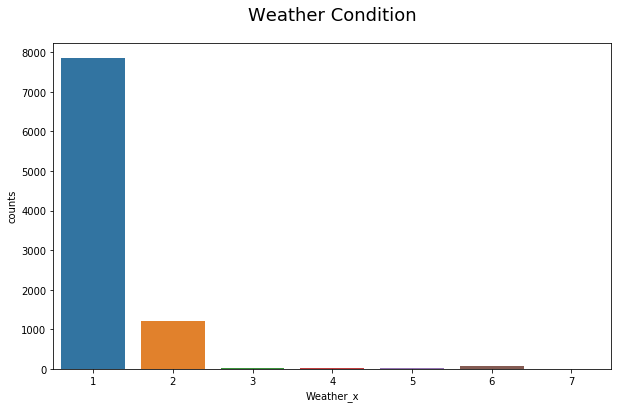

In [62]:
df = New.groupby(['Weather_x']).size().reset_index(name='counts')

fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(x ='Weather_x',
            y='counts',
            ax=ax,
            data=df)
ax.set_title('Weather Condition', fontsize=18, position=(0.5,1.05))

In [63]:
merged1['Crash Time'].head(5)

0     8:02:00 PM
1     7:23:00 AM
2     3:56:00 PM
3     3:56:00 PM
4    12:00:00 PM
Name: Crash Time, dtype: object

In [64]:
def period(row):
    rdf = []
    if(type(row) == float):
        row = str(row)
        rdf = row.split(".")
    else:
        rdf = str(row).split(":"); # day -- 7am-7pm
        
    hr = rdf[0]
    if int(hr) > 7 and int(hr) < 9: # morning rush hour
        return 1;
    if int(hr) > 9 and int(hr) < 16:# day time
        return 2;
    if int(hr) > 16 and int(hr) <19: # afternoon rush hour:
        return 3;
    else: # night
        return 4;

In [65]:
New['Crash Time'] = New['Crash Time'].apply(period)

In [66]:
New['Crash Time'].value_counts()

4    6316
2    1957
1     885
3      35
Name: Crash Time, dtype: int64

Text(0.5, 1.05, 'Crash Time Distribution')

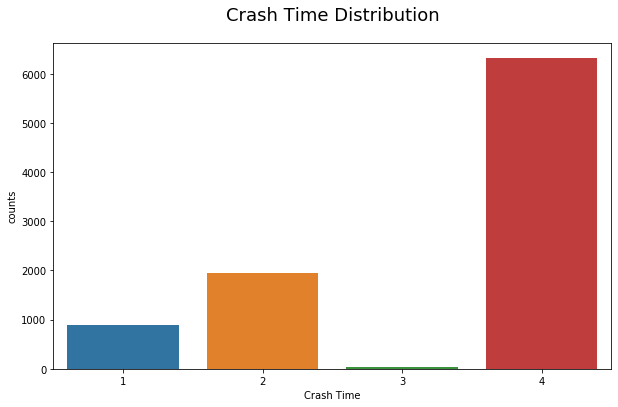

In [67]:
df = New.groupby(['Crash Time']).size().reset_index(name='counts')

fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(x ='Crash Time',
            y='counts',
            ax=ax,
            data=df)
ax.set_title('Crash Time Distribution', fontsize=18, position=(0.5,1.05))

In [68]:
New["Light_x"].value_counts()

DAYLIGHT                    6269
DARK LIGHTS ON              2076
DARK NO LIGHTS               257
DUSK                         211
DAWN                         181
UNKNOWN                       97
DARK -- UNKNOWN LIGHTING      93
OTHER                          9
Name: Light_x, dtype: int64

In [69]:
New['Light_x'].fillna('UNKNOWN', inplace=True)

In [70]:
encoding_light = {"Light_x": 
                            {"DAYLIGHT": 1,
                             "DARK LIGHTS ON": 2,
                             "DARK NO LIGHTS": 3,
                             "DUSK": 4,
                             "DARK -- UNKNOWN LIGHTING": 3,
                             "DAWN": 4,
                             "UNKNOWN": 1,
                            "OTHER": 1}}
New.replace(encoding_light, inplace=True)
New['Light_x'].value_counts()

1    6375
2    2076
4     392
3     350
Name: Light_x, dtype: int64

Text(0.5, 1.05, 'Light Condition')

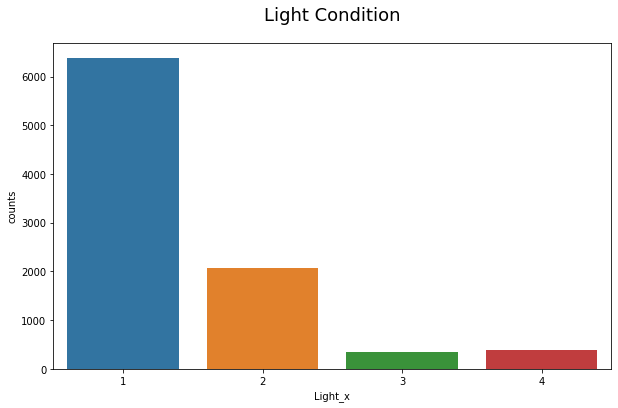

In [71]:
df = New.groupby(['Light_x']).size().reset_index(name='counts')

fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(x ='Light_x',
            y='counts',
            ax=ax,
            data=df)
ax.set_title('Light Condition', fontsize=18, position=(0.5,1.05))

In [72]:
#print(New.columns.values)
print(New.columns.tolist())

['Report Number', 'Agency Name_x', 'ACRS Report Type_x', 'Crash Date', 'Crash Time', 'Hit/Run', 'Route Type_x', 'Mile Point', 'Mile Point Direction', 'Lane Direction', 'Lane Number', 'Number of Lanes', 'Direction', 'Distance', 'Distance Unit', 'Road Grade', 'NonTraffic', 'Cross-Street Type_x', 'Related Non-Motorist_x', 'At Fault', 'Collision Type_x', 'Weather_x', 'Surface Condition_x', 'Light_x', 'Traffic Control_x', 'Driver Substance Abuse_x', 'Non-Motorist Substance Abuse_x', 'First Harmful Event', 'Second Harmful Event', 'Fixed Oject Struck', 'Junction', 'Intersection Type', 'Road Alignment', 'Road Condition', 'Road Division', 'Latitude_x', 'Longitude_x', 'Location_x', 'Driver At Fault', 'Injury Severity', 'Driver Distracted By', 'Drivers License State', 'Vehicle Damage Extent', 'Vehicle First Impact Location', 'Vehicle Second Impact Location', 'Vehicle Body Type', 'Vehicle Movement', 'Vehicle Continuing Dir', 'Vehicle Going Dir', 'Speed Limit', 'Driverless Vehicle', 'Parked Vehicle

In [73]:
New['Vehicle Year'].value_counts()

2015    680
2014    662
2013    594
2016    581
2012    532
2011    496
2007    489
2008    484
2006    476
2005    421
2009    405
2010    395
2004    387
2017    379
2003    322
2002    251
2001    248
2018    227
2000    201
0       198
1999    152
2019    126
1998    110
1997     97
1996     60
1995     43
1994     34
2020     34
1993     25
1992     11
1990      9
1988      9
1991      8
1987      8
1989      7
1900      4
1985      4
1984      3
99        3
9999      2
1978      2
1975      1
1983      1
1025      1
3863      1
2022      1
1234      1
1986      1
1901      1
198       1
1971      1
2021      1
1972      1
1980      1
1140      1
Name: Vehicle Year, dtype: int64

In [74]:
New['Vehicle Make'].value_counts()

TOYOTA         1247
HONDA          1022
FORD            906
NISSAN          488
TOYT            457
HOND            306
DODGE           246
CHEV            206
CHEVROLET       202
JEEP            188
HYUNDAI         180
UNKNOWN         179
BMW             178
NISS            164
CHEVY           160
LEXUS           149
ACURA           136
KIA             128
SUBARU          112
MAZDA           110
HYUN            109
GMC             104
MERZ             92
THOMAS           83
AUDI             81
MERCEDES         73
VOLK             66
GILL             63
DODG             54
VOLKSWAGON       53
               ... 
TOYTOTA           1
KTM               1
LINCOLDN          1
JOHN DEERE        1
WORK              1
CHERVOLET         1
GRUNMAN           1
HUY               1
HYUNADAI          1
INFINTI           1
STER              1
INFINIT           1
GOLD              1
VOLVE             1
TRIU              1
CRYS              1
HODA              1
NDMC              1
BMX               1


In [75]:
New['Vehicle Model'].value_counts()

4S             780
TK             606
COROLLA        332
CAMRY          325
ACCORD         312
CIVIC          302
BUS            219
UNKNOWN        184
CRV            152
4D             149
ALTIMA         149
RAV4           124
VAN            100
SUV            100
TRUCK           91
VN              90
SIENNA          88
PRIUS           86
CHARGER         84
EXPLORER        81
2S              78
SENTRA          77
ODYSSEY         76
ELANTRA         75
SONATA          71
HIGHLANDER      71
PILOT           71
4DR             68
F150            63
JETTA           62
              ... 
ECONOVAN         1
WRANLER          1
ACCORD4S         1
2S`              1
E450             1
RX7              1
ODESSY           1
LIMITED          1
X8               1
T800             1
V50              1
BUCKET TK        1
FORD             1
B CLASS          1
TOWER            1
AVALON  XLS      1
ROX              1
YN50             1
GS300            1
CANYONS          1
3201             1
CRANE       

In [76]:
# I decided to drop vehicle year, vehicle model and make. I don't think much trend related to vehicle.

In [77]:
New['Road Division'].value_counts()

TWO-WAY, DIVIDED, POSITIVE MEDIAN BARRIER           4252
TWO-WAY, NOT DIVIDED                                2785
UNKNOWN                                              939
TWO-WAY, DIVIDED, UNPROTECTED PAINTED MIN 4 FEET     888
ONE-WAY TRAFFICWAY                                   171
OTHER                                                116
TWO-WAY, NOT DIVIDED WITH A CONTINUOUS LEFT TURN      42
Name: Road Division, dtype: int64

In [78]:
encoding_RoadDivision = {"Road Division": 
                            {"TWO-WAY, DIVIDED, POSITIVE MEDIAN BARRIER": 1,
                             "TWO-WAY, NOT DIVIDED": 2,
                             "TWO-WAY, DIVIDED, UNPROTECTED PAINTED MIN 4 FEET": 3,
                             "TWO-WAY, NOT DIVIDED WITH A CONTINUOUS LEFT TURN": 2,
                             "ONE-WAY TRAFFICWAY": 4,
                             "OTHER": 1,
                             "UNKNOWN": 1}}
New.replace(encoding_RoadDivision, inplace=True)
New['Road Division'].value_counts()

1    5307
2    2827
3     888
4     171
Name: Road Division, dtype: int64

In [79]:
New['Road Alignment'].value_counts(normalize= True)

STRAIGHT       0.808985
UNKNOWN        0.094637
CURVE RIGHT    0.054607
CURVE LEFT     0.037420
OTHER          0.004351
Name: Road Alignment, dtype: float64

Text(0.5, 1.05, 'Road Alignment')

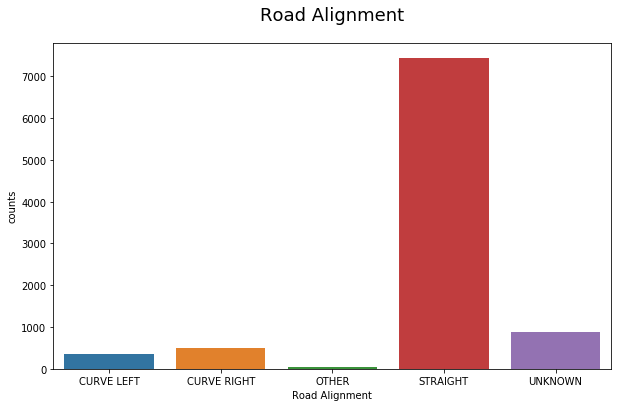

In [80]:
df = New.groupby(['Road Alignment']).size().reset_index(name='counts')

fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(x ='Road Alignment',
            y='counts',
            ax=ax,
            data=df)
ax.set_title('Road Alignment', fontsize=18, position=(0.5,1.05))

In [81]:
encoding_RoadAlign = {"Road Alignment": 
                            {"STRAIGHT": 1,
                             "CURVE RIGHT": 2,
                             "CURVE LEFT": 3,
                             "UNKNOWN": 4,
                             "OTHER": 4}}
New.replace(encoding_RoadAlign, inplace=True)
New['Road Alignment'].value_counts()

1    7437
4     910
2     502
3     344
Name: Road Alignment, dtype: int64

In [82]:
New['Direction'].value_counts()

North      3544
East       2115
South      1644
West       1049
UNKNOWN     837
Unknown       4
Name: Direction, dtype: int64

In [83]:
New['Number of Lanes'].value_counts()

3     2917
2     2705
1     1643
0      874
4      710
5      155
6      150
7       18
8       15
10       3
9        2
12       1
Name: Number of Lanes, dtype: int64

In [84]:
New['Lane Number'].value_counts()

1    4285
2    1851
0    1830
3    1096
4     117
6       7
5       7
Name: Lane Number, dtype: int64

In [85]:
New['Vehicle Movement'].value_counts()

MOVING CONSTANT SPEED      3567
SLOWING OR STOPPING        1360
STOPPED IN TRAFFIC LANE    1000
MAKING LEFT TURN            900
ACCELERATING                511
BACKING                     282
MAKING RIGHT TURN           280
CHANGING LANES              244
STARTING FROM LANE          218
UNKNOWN                     183
PARKED                      154
STARTING FROM PARKED        112
PARKING                     102
MAKING U TURN                64
SKIDDING                     45
ENTERING TRAFFIC LANE        42
PASSING                      40
OTHER                        40
NEGOTIATING A CURVE          27
RIGHT TURN ON RED            11
LEAVING TRAFFIC LANE         10
DRIVERLESS MOVING VEH.        1
Name: Vehicle Movement, dtype: int64

In [86]:
New['NonTraffic'].value_counts()

No     8359
Yes     834
Name: NonTraffic, dtype: int64

In [87]:
encoding_NonTraffic = {"NonTraffic": 
                           
                            {"No": 1,
                             "Yes": 2,
                           }}
New.replace(encoding_NonTraffic, inplace=True)
New['NonTraffic'].value_counts()

1    8359
2     834
Name: NonTraffic, dtype: int64

In [88]:
New['Related Non-Motorist_x'].value_counts()

UNKNOWN                   8853
PEDESTRIAN                 265
BICYCLIST                   63
OTHER CONVEYANCE             6
OTHER                        5
MACHINE OPERATOR/RIDER       1
Name: Related Non-Motorist_x, dtype: int64

In [89]:
New['At Fault'].value_counts()

DRIVER         8611
UNKNOWN         497
NONMOTORIST      70
BOTH             15
Name: At Fault, dtype: int64

In [90]:
encoding_AtFault = {"At Fault":                   
                            {"UNKNOWN": 3,
                             "DRIVER": 1,
                             'NONMOTORIST': 2,
                             'BOTH': 1 }}
New.replace(encoding_AtFault, inplace=True)
New['At Fault'].value_counts()

1    8626
3     497
2      70
Name: At Fault, dtype: int64

df_train1 = New[['Related Non-Motorist_x', "Driver Substance Abuse_x",'Collision Type_x', 'Weather_x', 'Surface Condition_x', 'Light_x', 'Traffic Control_x', 'Non-Motorist Substance Abuse_x', 'At Fault', 'Driver Distracted By', 'Vehicle Body Type', 'Vehicle Movement', 'Vehicle Continuing Dir', 'Vehicle Going Dir', 'Speed Limit', 'Driverless Vehicle', 'Equipment Problems', 'Crash Date', 'Crash Time', 'Hit/Run', 'Mile Point', 'Distance', 'Distance Unit', 'NonTraffic', 'First Harmful Event', 'Fixed Oject Struck', 'Junction', 'Intersection Type', 'Road Alignment', 'Road Division']]

In [180]:
df_train1 = New[["Driver Substance Abuse_x",'Collision Type_x', 'Weather_x', 'Surface Condition_x', 'Light_x', 'Traffic Control_x', 'Non-Motorist Substance Abuse_x', 'At Fault', 'Driver Distracted By', 'Vehicle Body Type', 'Vehicle Movement', 'Vehicle Continuing Dir', 'Vehicle Going Dir', 'Speed Limit', 'Equipment Problems', 'Crash Date', 'Crash Time', 'Hit/Run', 'Distance', 'NonTraffic',  'Fixed Oject Struck', 'Intersection Type', 'Road Alignment', 'Road Division']]

In [181]:
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9193 entries, 0 to 9192
Data columns (total 24 columns):
Driver Substance Abuse_x          9193 non-null int64
Collision Type_x                  9193 non-null int64
Weather_x                         9193 non-null int64
Surface Condition_x               9193 non-null int64
Light_x                           9193 non-null int64
Traffic Control_x                 9193 non-null object
Non-Motorist Substance Abuse_x    9193 non-null int64
At Fault                          9193 non-null int64
Driver Distracted By              9193 non-null int64
Vehicle Body Type                 9193 non-null object
Vehicle Movement                  9193 non-null object
Vehicle Continuing Dir            9193 non-null object
Vehicle Going Dir                 9193 non-null object
Speed Limit                       9193 non-null int64
Equipment Problems                9193 non-null object
Crash Date                        9193 non-null object
Crash Time            

In [182]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 50)
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(123)
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier, plot_importance, plot_tree
import itertools

In [183]:
# Label encoder
from sklearn.preprocessing import LabelEncoder
lblE = LabelEncoder()
for i in df_train1:
    if df_train1[i].dtype == 'object':
        lblE.fit(df_train1[i])
        df_train1[i] = lblE.transform(df_train1[i])

C:\Users\ywei1\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


TypeError: Encoders require their input to be uniformly strings or numbers. Got ['float', 'str']

In [184]:
cols_to_remove = []

for col in df_train1.columns:
    try:
        _ = df_train1[col].astype(float)
    except ValueError:
        print('Couldn\'t covert %s to float' % col)
        cols_to_remove.append(col)
        pass

# keep only the columns in df that do not contain string
df_train = df_train1[[col for col in df_train1.columns if col not in cols_to_remove]]

Couldn't covert Distance to float
Couldn't covert Fixed Oject Struck to float
Couldn't covert Intersection Type to float


In [185]:
#print(New.columns.values)
print(df_train.columns.tolist())

['Driver Substance Abuse_x', 'Collision Type_x', 'Weather_x', 'Surface Condition_x', 'Light_x', 'Traffic Control_x', 'Non-Motorist Substance Abuse_x', 'At Fault', 'Driver Distracted By', 'Vehicle Body Type', 'Vehicle Movement', 'Vehicle Continuing Dir', 'Vehicle Going Dir', 'Speed Limit', 'Equipment Problems', 'Crash Date', 'Crash Time', 'Hit/Run', 'NonTraffic', 'Road Alignment', 'Road Division']


In [186]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9193 entries, 0 to 9192
Data columns (total 21 columns):
Driver Substance Abuse_x          9193 non-null int64
Collision Type_x                  9193 non-null int64
Weather_x                         9193 non-null int64
Surface Condition_x               9193 non-null int64
Light_x                           9193 non-null int64
Traffic Control_x                 9193 non-null int32
Non-Motorist Substance Abuse_x    9193 non-null int64
At Fault                          9193 non-null int64
Driver Distracted By              9193 non-null int64
Vehicle Body Type                 9193 non-null int32
Vehicle Movement                  9193 non-null int32
Vehicle Continuing Dir            9193 non-null int32
Vehicle Going Dir                 9193 non-null int32
Speed Limit                       9193 non-null int64
Equipment Problems                9193 non-null int32
Crash Date                        9193 non-null int32
Crash Time                   

In [137]:
encoding_Severity = {"Injury Severity":                      
                            {"NO APPARENT INJURY": 3,
                             "FATAL INJURY": 1,
                             'SUSPECTED MINOR INJURY': 2,
                             'POSSIBLE INJURY': 2,
                            'SUSPECTED SERIOUS INJURY': 1}}
New.replace(encoding_Severity, inplace=True)
New['Injury Severity'].value_counts()

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [100]:
New['Injury Severity'].value_counts()

3    7349
2    1677
1     167
Name: Injury Severity, dtype: int64

In [101]:
df_test = New[['Injury Severity']]

In [138]:
# Splitting the data into train and test sets (automatically uses stratified sampling by labels)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train, df_test, test_size=0.3)

In [187]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train, df_test, test_size=0.25, random_state=42)

In [188]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
y_pred = logisticRegr.predict(X_test)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

C:\Users\ywei1\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[[   0    0   51]
 [   0    0  417]
 [   0    0 1831]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        51
           2       0.00      0.00      0.00       417
           3       0.80      1.00      0.89      1831

    accuracy                           0.80      2299
   macro avg       0.27      0.33      0.30      2299
weighted avg       0.63      0.80      0.71      2299

Accuracy: 0.7964332318399304


C:\Users\ywei1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ywei1\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ywei1\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and bein

In [189]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
y_pred = logisticRegr.predict(X_test)
#print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

C:\Users\ywei1\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


              precision    recall  f1-score   support

           1       0.00      0.00      0.00        51
           2       0.00      0.00      0.00       417
           3       0.80      1.00      0.89      1831

    accuracy                           0.80      2299
   macro avg       0.27      0.33      0.30      2299
weighted avg       0.63      0.80      0.71      2299

Accuracy: 0.7964332318399304


C:\Users\ywei1\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ywei1\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ywei1\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and bein

In [190]:
print("Train:", logisticRegr.score(X_train, y_train))
print("Test:", logisticRegr.score(X_test, y_test))

lr_y_preds_train = logisticRegr.predict(X_train)
print(classification_report(y_train, lr_y_preds_train, target_names=['1', '2',"3"]))

lr_y_preds_test = logisticRegr.predict(X_test)
print(classification_report(y_test, lr_y_preds_test, target_names=['1', '2','3']))

Train: 0.800406150275602
Test: 0.7964332318399304
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       116
           2       0.00      0.00      0.00      1260
           3       0.80      1.00      0.89      5518

    accuracy                           0.80      6894
   macro avg       0.27      0.33      0.30      6894
weighted avg       0.64      0.80      0.71      6894

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        51
           2       0.00      0.00      0.00       417
           3       0.80      1.00      0.89      1831

    accuracy                           0.80      2299
   macro avg       0.27      0.33      0.30      2299
weighted avg       0.63      0.80      0.71      2299



C:\Users\ywei1\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ywei1\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ywei1\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ywei1\Anaconda3\lib\site-packages\sklearn\metr

In [191]:
from sklearn.ensemble import RandomForestClassifier
#class_weight = dict({2:1, 1:15, 0:50})
rdf = RandomForestClassifier(n_estimators=300,random_state=35)

rdf.fit(X_train,y_train)

y_pred=rdf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

C:\Users\ywei1\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy: 0.7881687690300131
[[   3    5   43]
 [   0   34  383]
 [   0   56 1775]]
              precision    recall  f1-score   support

           1       1.00      0.06      0.11        51
           2       0.36      0.08      0.13       417
           3       0.81      0.97      0.88      1831

    accuracy                           0.79      2299
   macro avg       0.72      0.37      0.37      2299
weighted avg       0.73      0.79      0.73      2299



In [192]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


[[   3    5   43]
 [   0   34  383]
 [   0   56 1775]]
              precision    recall  f1-score   support

           1       1.00      0.06      0.11        51
           2       0.36      0.08      0.13       417
           3       0.81      0.97      0.88      1831

    accuracy                           0.79      2299
   macro avg       0.72      0.37      0.37      2299
weighted avg       0.73      0.79      0.73      2299

Accuracy: 0.7881687690300131


In [196]:
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier, plot_importance, plot_tree
import itertools

xgb = XGBClassifier(random_state=42)

xgb.fit(X_train, y_train)


y_pred=xgb.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 



C:\Users\ywei1\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\ywei1\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy: 0.7833840800347978
[[   6   15   30]
 [   1   55  361]
 [   3   88 1740]]
              precision    recall  f1-score   support

           1       0.60      0.12      0.20        51
           2       0.35      0.13      0.19       417
           3       0.82      0.95      0.88      1831

    accuracy                           0.78      2299
   macro avg       0.59      0.40      0.42      2299
weighted avg       0.73      0.78      0.74      2299



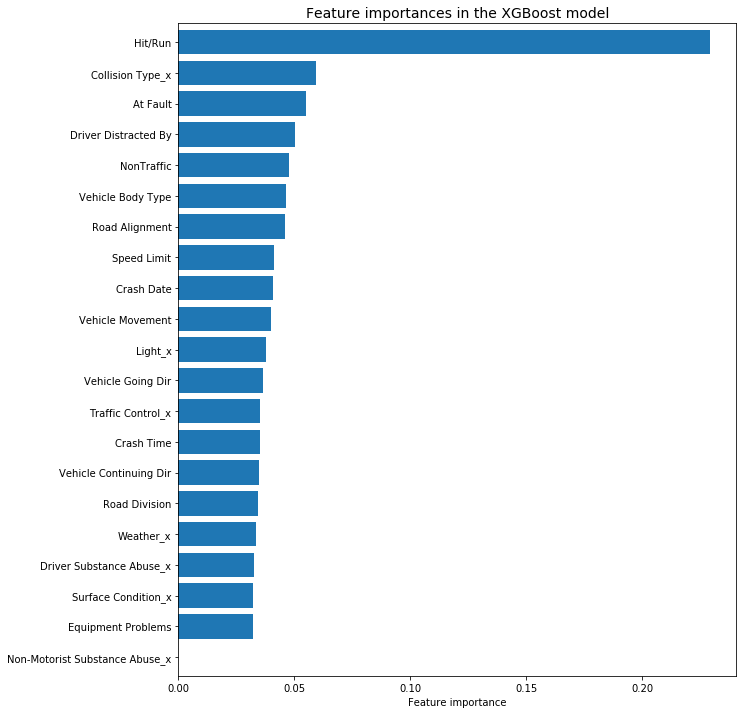

In [205]:
# Get feature importance from xgb model
ft_weights = pd.DataFrame(xgb.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights.sort_values('weight', inplace=True)

# Plotting feature importances
plt.figure(figsize=(10,12))
plt.barh(ft_weights.index, ft_weights.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()

In [197]:
from sklearn.ensemble import RandomForestClassifier
#class_weight = dict({2:1, 1:15, 0:50})
rdf1 = RandomForestClassifier(bootstrap=True,
            class_weight="balanced_subsample", 
            criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=300,
            oob_score=True,
            random_state=35,
            verbose=0, warm_start=False)

In [198]:

rdf1.fit(X_train,y_train)

y_pred=rdf1.predict(X_test)


#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

C:\Users\ywei1\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy: 0.6389734667246629
[[  29   14    8]
 [  24  236  157]
 [  58  569 1204]]
              precision    recall  f1-score   support

           1       0.26      0.57      0.36        51
           2       0.29      0.57      0.38       417
           3       0.88      0.66      0.75      1831

    accuracy                           0.64      2299
   macro avg       0.48      0.60      0.50      2299
weighted avg       0.76      0.64      0.68      2299



In [199]:
import matplotlib.pyplot as plt

# get importance
importance = rdf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))


Feature: 0, Score: 0.01460
Feature: 1, Score: 0.08714
Feature: 2, Score: 0.01991
Feature: 3, Score: 0.02405
Feature: 4, Score: 0.04125
Feature: 5, Score: 0.06013
Feature: 6, Score: 0.00033
Feature: 7, Score: 0.01385
Feature: 8, Score: 0.01902
Feature: 9, Score: 0.06364
Feature: 10, Score: 0.08135
Feature: 11, Score: 0.05452
Feature: 12, Score: 0.05464
Feature: 13, Score: 0.09174
Feature: 14, Score: 0.03043
Feature: 15, Score: 0.20874
Feature: 16, Score: 0.04321
Feature: 17, Score: 0.01612
Feature: 18, Score: 0.00364
Feature: 19, Score: 0.02478
Feature: 20, Score: 0.04694


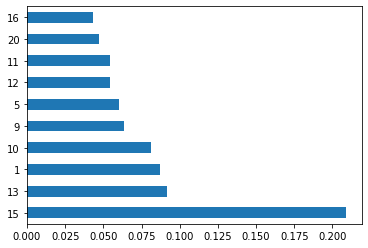

In [200]:
(pd.Series(rdf.feature_importances_)
   .nlargest(10)
   .plot(kind='barh'))  

In [148]:
# get importance
importance = rdf1.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))


Feature: 0, Score: 0.02786
Feature: 1, Score: 0.15387
Feature: 2, Score: 0.00887
Feature: 3, Score: 0.01011
Feature: 4, Score: 0.02989
Feature: 5, Score: 0.02720
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.06226
Feature: 8, Score: 0.01728
Feature: 9, Score: 0.08199
Feature: 10, Score: 0.06147
Feature: 11, Score: 0.02758
Feature: 12, Score: 0.02924
Feature: 13, Score: 0.09295
Feature: 14, Score: 0.03195
Feature: 15, Score: 0.08726
Feature: 16, Score: 0.02079
Feature: 17, Score: 0.06033
Feature: 18, Score: 0.01110
Feature: 19, Score: 0.04503
Feature: 20, Score: 0.03500
Feature: 21, Score: 0.05204
Feature: 22, Score: 0.02591


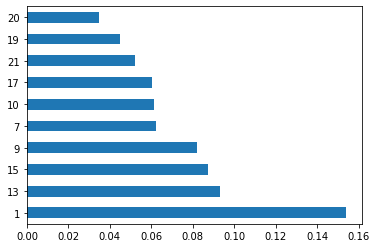

In [149]:
(pd.Series(rdf1.feature_importances_)
   .nlargest(10)
   .plot(kind='barh'))  

In [ ]:
def plot_feature_importances(model, figsize=(6,14)):
    """Plots a graph of feature importances for a model"""
    ft_weights = pd.DataFrame(rdf.feature_importances_, columns=['weight'], index=df_train.columns)
    ft_weights.sort_values('weight', inplace=True)
    plt.figure(figsize=(10,14))
    plt.barh(ft_weights.index, ft_weights.weight, align='center') 
    plt.title("Feature importances in the RDF model", fontsize=14)
    plt.xlabel("Feature importance")
    plt.margins(y=0.01)
    plt.show()

In [ ]:
plot_feature_importances(rdf)